In [3993]:
import ugradio
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq, fftshift, ifftshift
from scipy import signal as sig
from scipy.stats import norm

In [3994]:
def extractData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeBuffer(raw_data['time_data']))
    return normalize(windowed_data)

def extractNoiseData(filename):
    prefix = "ugastro\\Lab1Data\\"
    raw_data = np.load(prefix + filename)
    windowed_data = windowData(removeNoiseBuffer(raw_data['time_data']))
    return noise_normalize(windowed_data)

def removeBuffer(data):
    return data[1:2][0]

def removeNoiseBuffer(data):
    return data[1:]

def windowData(data):
    return data[:]

def normalize(data):
    return (data - np.mean(data))

def noise_normalize(data):
    return (data - np.mean(data)) / np.std(data)

In [3995]:
# Consistent Plot Params
title = 13

In [3996]:
# Extracting Data
# 5.2
data_480_900 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_950 = extractData("Section5_2\\lab_1_data_480khz_900khz.npz")
data_480_1000 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")
data_480_1300 = extractData("Section5_2\\lab_1_data_480khz_1300khz.npz")
data_480_2000 = extractData("Section5_2\\lab_1_data_480khz_2000khz.npz")
data_480_3000 = extractData("Section5_2\\lab_1_data_480khz_3000khz.npz")
data_480_3100 = extractData("Section5_2\\lab_1_data_480khz_1000khz.npz")
data_1450_3100 = extractData("Section5_2\\lab_1_data_1450khz_3100khz.npz")

data_200_1000 = extractData("Section5_2\\lab_1_data_200khz_1000khz.npz")
data_200_1500 = extractData("Section5_2\\lab_1_data_200khz_1500khz.npz")
data_200_2000 = extractData("Section5_2\\lab_1_data_200khz_2000khz.npz")
data_200_3000 = extractData("Section5_2\\lab_1_data_200khz_3000khz.npz")

# 5.5
data_400_3100 = extractData("Section5_5\\lab_1_data_400khz_3100khz.npz")
data_401500_3100 = extractData("Section5_5\\lab_1_data_401500hz_3100khz.npz")
data_401750_3100 = extractData("Section5_5\\lab_1_data_401750hz_3100khz.npz")
data_402000_3100 = extractData("Section5_5\\lab_1_data_402000hz_3100khz.npz")
data_403000_3100 = extractData("Section5_5\\lab_1_data_403000hz_3100khz.npz")

# 5.6
data_400_1000 = extractData("Section5_6\\lab_1_data_400khz_1000khz.npz")
#data_1520_1000 = extractData("Section5_6\\lab_1_data_1520khz_1000khz.npz")
data_1600_1000 = extractData("Section5_6\\lab_1_data_1600khz_1000khz.npz")
data_1610_1000 = extractData("Section5_6\\lab_1_data_1610khz_1000khz.npz")
#data_1620_1000 = extractData("Section5_6\\lab_1_data_1620khz_1000khz.npz")
data_1980_1000 = extractData("Section5_6\\lab_1_data_1980khz_1000khz.npz")
#data_2480_1000 = extractData("Section5_6\\lab_1_data_2480khz_1000khz.npz")

# 5.7
data_noise_1000 = extractNoiseData("Section5_7\\lab_1_data_noise_1000khz.npz")
data_noise_2000 = extractNoiseData("Section5_7\\lab_1_data_noise_2000khz.npz")
data_noise_3000 = extractNoiseData("Section5_7\\lab_1_data_noise_3000khz.npz")

# 7.1
#data_400_420_2000 = extractData("Section7_1\\lab_1_data_400khz_420khz_2000khz.npz")
#data_400_420_2100 = extractData("Section7_1\\lab_1_data_400khz_420khz_2100khz.npz")
#data_400_420_2500 = extractData("Section7_1\\lab_1_data_400khz_420khz_2500khz.npz")
#data_400_420_3000 = extractData("Section7_1\\lab_1_data_400khz_420khz_3000khz.npz")
#data_400_420_3100 = extractData("Section7_1\\lab_1_data_400khz_420khz_3100khz.npz")
#data_400_380_2000 = extractData("Section7_1\\lab_1_data_400khz_380khz_2000khz.npz")
#data_400_380_2100 = extractData("Section7_1\\lab_1_data_400khz_380khz_2100khz.npz")
#data_400_380_2500 = extractData("Section7_1\\lab_1_data_400khz_380khz_2500khz.npz")
#data_400_380_3000 = extractData("Section7_1\\lab_1_data_400khz_380khz_3000khz.npz")
#data_400_380_3100 = extractData("Section7_1\\lab_1_data_400khz_380khz_3100khz.npz")
#data_200_210_3100 = extractData("Section7_1\\lab_1_data_200khz_210khz_3100khz.npz")
#data_200_190_3100 = extractData("Section7_1\\lab_1_data_200khz_190khz_3100khz.npz")
data_600_630_3100 = extractData("Section7_1\\lab_1_data_600khz_630khz_3100khz.npz")

# 7.3


times = windowData([i / 1e3 for i in range(0, 2048)])

In [3997]:
def printDataBlocks(dataset):
    n = len(dataset)
    fig, axs = plt.subplots(1, n, figsize=(18, 6))

    for i in range(0, n):
        axs[i].plot(times, data_480_1000[i])
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")

    plt.tight_layout()
    plt.show()

In [3998]:
def graphAllTimeData(datasets, labels, signal):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        axs[i].plot(times, data, label=labels[i], alpha=1)
        axs[i].scatter(times, data, alpha=1)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlabel("Time (ms)")
        axs[i].set_ylabel("Measured Voltage / Counts")
        axs[i].set_title(f"{signal} Signal w/ {labels[i]} Sample Rate")

    plt.tight_layout()
    plt.show()

In [3999]:
def graphOverlayTimeData(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        plt.plot(times, data, label=labels[i], alpha=1)
        plt.scatter(times, data, s=10)

    plt.xlabel("Time (ms)")
    plt.ylabel("Measured Voltage / Counts")
    plt.title(f"Analysis of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [4000]:
def graphAllPowerSpectra(datasets, sample_rates, labels, signal, xlim=None):
    n = len(datasets)
    fig, axs = plt.subplots(1, n, figsize=(25, 6))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2

        axs[i].plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{sample_rates[i]} kHz", alpha=1)        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power Spectral Density (10^5)")
        axs[i].set_title(f"FT of {signal} Signal w/ {labels[i]}", size=title)
        axs[i].grid(True, alpha=0.3)

    plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

def graphOverlayPowerSpectra(datasets, sample_rates, labels, signal, multiple=True, xlim=None):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))

        power_spectrum = abs(fft_data_shifted) ** 2
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)

    plt.xlim(-1000, 1000)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power Spectral Density (10^5)")
    if not multiple:
        plt.title(f"Power Spectra of {signal} Signal w/ {labels[i]}", size=13)
    else:
        plt.title(f"Power Spectra of {signal} Signal w/ Different Sample Rates", size=13)
    plt.legend()
    plt.xlim(xlim)
    plt.grid(True, alpha=0.3)
    plt.show()

def graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal, multiple=True, xlim=None):
    plt.figure(figsize=(12,8))
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[i]))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        power_spectrum_db = 10 * np.log10(power_spectrum)
        plt.plot(freq_bins / 1e3, power_spectrum /1e5, label=f"{labels[i]}", alpha=1)
        #plt.plot(freq_bins / 1e3, power_spectrum_db, label=f"{labels[i]}", alpha=1)

    plt.xlim(xlim)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power Spectral Density (10^5)")
    if not multiple:
        plt.title(f"One Sided Power Spectra of {signal} Signal w/ {labels[i]}", size=title)
    else:
        plt.title(f"One Sided Power Spectra of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [4001]:
def graphVoltageSpectra(datasets, sample_rates, labels, signal, multiple=True):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    for i, type in enumerate(["Real", "Imaginary"]):
        for j, data in enumerate(datasets):
            fft_data = fft(data)
            fft_data_shifted = fftshift(fft_data)
            freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[j]))

            if type == "Real":
                voltage_spectrum = fft_data_shifted.real
            else:
                voltage_spectrum = fft_data_shifted.imag

            axs[i].plot(freq_bins / 1e3, voltage_spectrum, label=f"{labels[j]}", alpha=1)
        axs[i].set_xlim(-600, 600)
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Voltage (mV)")
        if not multiple:
            axs[i].set_title(f"{type} Voltage Spectra of {signal} Signal w/ {labels[i]}", size=title)
        else:
            axs[i].set_title(f"{type} Voltage Spectra of {signal} Signal w/ Different Sample Rates", size=title)
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    plt.show()

In [4002]:
def graphInverseFTPowerSpectra(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)

        power_spectrum = abs(fft_data) ** 2

        ifft_data = ifft(power_spectrum)
        ifft_data_shifted = ifftshift(ifft_data)
        
        plt.plot(times, ifft_data_shifted, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectra2(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = fft(data)

        power_spectrum = (fft_data * np.conj(fft_data))

        ifft_data = ifft(power_spectrum)
        
        plt.plot(times, ifft_data, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (*Conjugate) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectraNumpy(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        convolve_data = np.convolve(data, data[::-1], mode='same')
        
        plt.plot(times, convolve_data, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (Numpy) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphInverseFTPowerSpectraNumpy2(datasets, labels, signal):
    plt.figure(figsize=(12,8))

    for i, data in enumerate(datasets):
        fft_data = np.fft.fft(data)
        fft_data_shifted = np.fft.fftshift(fft_data)

        power_spectrum = fft_data_shifted * np.conj(fft_data_shifted)

        ifft_data = np.fft.ifft(power_spectrum)
        ifft_data_shifted = np.fft.ifftshift(ifft_data)
        
        plt.plot(times, ifft_data_shifted, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (?)")
    plt.ylabel("Autocorrelation (?)")
    plt.title(f"Inverse FT of {signal} Signal Power Spectra (Numpy) w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [4003]:
def graphACF(datasets, labels, signal, window=-1):
    plt.figure(figsize=(12, 8))

    for i, data in enumerate(datasets):
        data = data[:window]
        acf = sig.correlate(data, data, mode="same")

        step = times[1] - times[0]
        lags = np.arange(times[0], times[0] + len(acf) * step, step)

        plt.plot(lags, acf, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (ms)")
    plt.ylabel("Power per Hz (V^2/Hz)")
    plt.title(f"Windowed Autocorrelation of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def graphNumpyACF(datasets, labels, signal, window=-1):
    plt.figure(figsize=(12, 8))

    for i, data in enumerate(datasets):
        data = data[:window]
        acf = np.correlate(data, data, mode="same")

        step = times[1] - times[0]
        lags = np.arange(times[0], times[0] + len(acf) * step, step)

        plt.plot(lags, acf, label=f"{labels[i]}", alpha=1)
        
    plt.xlabel("Lag (ms)")
    plt.ylabel("Power per Hz (V^2/Hz)")
    plt.title(f"Autocorrelation of {signal} Signal w/ Different Sample Rates", size=title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

In [4004]:
def compareACF(data, labels, signal, window=-1):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6), width_ratios=[3, 1])

    data = data[:window]
    step = times[1] - times[0]
    time = times[:window]

    for i in range(0, 2):
        fft_data = fft(data)
        power_spectrum = abs(fft_data) ** 2
        ifft_data = ifft(power_spectrum)
        ifft_data_shifted = ifftshift(ifft_data)
        axs[i].plot(time, ifft_data_shifted/1e5, label=f"{labels[0]}", alpha=0.4, color='green')

        acf = sig.correlate(data, data, mode="same")
        lags = np.arange(times[0], times[0] + len(acf) * step, step)
        axs[i].plot(lags, acf/1e5, label=f"{labels[2]}", alpha=1, color='red')

        convolve_data = np.convolve(data, data[::-1], mode='same')
        axs[i].plot(time, convolve_data/1e5, label=f"{labels[1]}", alpha=0.6, color='blue')
            
        axs[i].set_xlabel("Lag ms)")
        axs[i].set_ylabel("Power per Hz (10^5 V^2/Hz)")
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    axs[0].set_title(f"Inverse FT of {signal} Power Spectra vs ACF w/ 3 MHz Sample Rate", size=title)
    axs[1].set_title(f"Closeup of Top Center Peak", size=title)
    axs[1].set_xlim(1.2, 1.3)
    axs[1].set_ylim(0.15, 0.25)

    plt.show()

In [4005]:
def graphDFT(data, label, vsamp, rate_label, xlim=None, ylim=None):
    plt.figure(figsize=(12,8))

    times = windowData(np.linspace(0, len(data)/vsamp, len(data)))

    #freq_bins = fftshift(fftfreq(len(times), d=1/(1*vsamp)))
    freq_bins = np.arange(-vsamp/2, vsamp/2, 1e3)

    f, dft_data = ugradio.dft.dft(xt=data, t=times, f=freq_bins, vsamp=vsamp)
    #dft_data = fftshift(dft_data)

    power_spectrum = (abs(dft_data) ** 2)
    #power_spectrum_db = 10 * np.log10(power_spectrum)

    print(f)

    plt.plot(freq_bins/1e3, power_spectrum)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("Frequency (kHz)")
    plt.ylabel("Power Spectral Density (dB)")
    plt.title(f"DFT of {label} Signal w/ {rate_label}", size=title)

In [4006]:
def graphFreqRes(datasets, sample_rate, sample, base, secondaries, num_samples):
    # Takes set of data of two close frequencies and plots their power spectra
    # Takes a full block and plots one row of 200 sample and another of all samples
    fig, axs = plt.subplots(2, len(datasets), figsize=(25, 12))

    for i, data in enumerate(datasets):
        mid = len(data) // 2
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]

        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rate))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[0][i].plot(freq_bins / 1e3, power_spectrum, label=f"{sample}", alpha=1)

        axs[0][i].set_xlabel("Frequency (Hz)")
        axs[0][i].set_ylabel("Power (V^2)")
        axs[0][i].set_title(f"{base} & {secondaries[i]} Signals w/ 2048 Samples", size=title)
        axs[0][i].grid(True, alpha=0.3)
        axs[0][i].legend()
        axs[0][i].set_xlim(390, 415)

    for j, data in enumerate(datasets):
        window = data[:num_samples]
        mid = len(window) // 2
        fft_data = fft(window)
        fft_data_shifted = fftshift(fft_data)[mid:]

        freq_bins = fftshift(fftfreq(num_samples, d=1/sample_rate))[mid:]
        windowed_bins = freq_bins[:num_samples]
        
        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[1][j].plot(windowed_bins / 1e3, power_spectrum, label=f"{sample}", alpha=1)

        axs[1][j].set_xlabel("Frequency (Hz)")
        axs[1][j].set_ylabel("Power (V^2)")
        axs[1][j].set_title(f"{base} & {secondaries[j]} Signals w/ {num_samples} Samples", size=title)
        axs[1][j].grid(True, alpha=0.3)
        axs[1][j].legend()
        axs[1][j].set_xlim(390, 415)

    plt.show()

In [4007]:
def graphFourierFilter(datasets, sample_rates, labels, signals, xlim=None):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))

    for i, type in enumerate(["Real", "Imaginary"]):
        for j, data in enumerate(datasets):
            fft_data = fft(data)
            fft_data_shifted = fftshift(fft_data)
            freq_bins = fftshift(fftfreq(len(times), d=1/sample_rates[j]))

            if type == "Real":
                fft_data_shifted.real = np.zeros(len(fft_data_shifted.real))
            else:
                fft_data_shifted.imag = np.zeros(len(fft_data_shifted.imag))

            ifft_data = ifft(ifftshift(fft_data_shifted))

            axs[i].plot(freq_bins / 1e3, ifft_data, label=f"{labels[0]}", alpha=1)
        axs[i].set_xlim(-600, 600)
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Voltage (mV)")
        axs[i].set_title(f"{type} Fourier Filter of {signals} Signal w/ {labels[0]}", size=title)
        axs[i].legend()
        axs[i].grid(True, alpha=0.3)

    plt.show()

In [4008]:
def graphNyquistWindows(datasets, sample_rate, signals, windows, xlim=None):
    # sample_rate = (rate, label)
    fig, axs = plt.subplots(1, len(datasets), figsize=(25, 6))
    mid = len(times) // 2

    for i, data in enumerate(datasets):
        fft_data = fft(data)
        fft_data_shifted = fftshift(fft_data)[mid:]
        freq_bins = fftshift(fftfreq(len(times), d=1/sample_rate[0]))[mid:]

        power_spectrum = 2 * (abs(fft_data_shifted) ** 2)
        #power_spectrum_db = 10 * np.log10(power_spectrum)

        axs[i].plot(freq_bins / 1e3, power_spectrum, label=f"{sample_rate[1]}", alpha=1)        
        axs[i].set_xlabel("Frequency (kHz)")
        axs[i].set_ylabel("Power (V^2)")
        axs[i].set_title(f"Power Spectra of {signals[i]} Signal w/ {sample_rate[1]} ({windows[i]})", size=title)
        axs[i].grid(True, alpha=0.3)
        axs[i].set_xlim(xlim)
        axs[i].tick_params(axis='both', which='both', labelsize=10)

    plt.tight_layout()
    plt.show()

In [4009]:
def graphGaussianHistogram(datasets, sample_rate, signals):
    # Check block size first
    fig, axs = plt.subplots(1, len(datasets), figsize=(18, 6))

    for i, data in enumerate(datasets):
        axs[i].hist(data, bins=100, density=True, alpha=0.6, label="Sampled Data")

        bin_edges = np.linspace(min(data), max(data), 100)
        gaussian_fit = norm.pdf(bin_edges, np.mean(data), np.std(data))
        axs[i].plot(bin_edges, gaussian_fit, 'r--', linewidth=2, label="Gaussian Fit")

        axs[i].set_xlabel("Measured Voltage / Counts")
        axs[i].set_ylabel("Probability Density")
        axs[i].set_title(f"Noise of {signals[i]} Signal", size=title)
        axs[i].legend()

    plt.tight_layout()
    plt.show()

In [4010]:
#def computeAvgPowerSpectra(dataset):
    # Check block size first

C:\Users\brand\AppData\Local\Temp\ipykernel_19488\1202887868.py:55: RuntimeWarning: divide by zero encountered in log10
  power_spectrum_db = 10 * np.log10(power_spectrum)


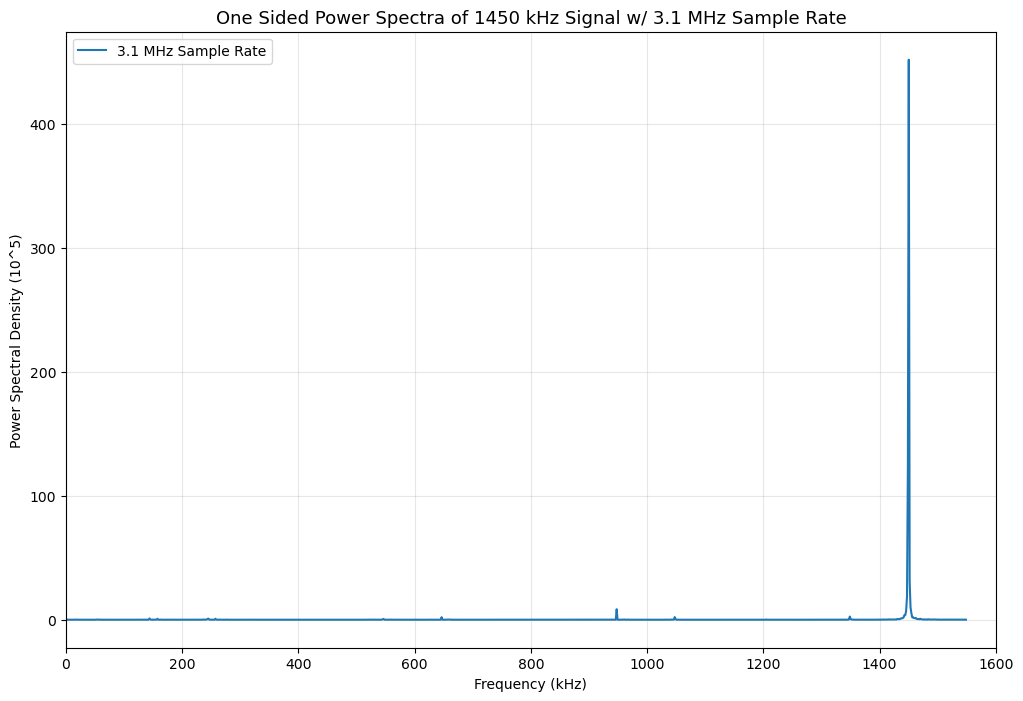

[-1550000. -1549000. -1548000. ...  1547000.  1548000.  1549000.]


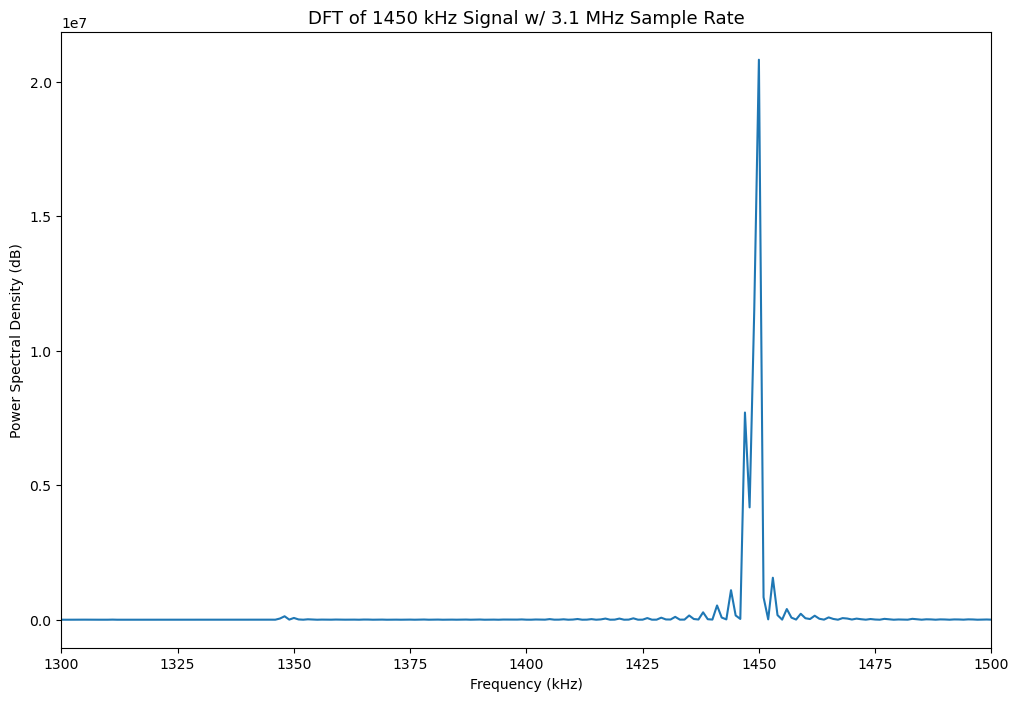

In [4011]:
datasets = [data_1450_3100]
sample_rates = [3.1e6]
labels = ["3.1 MHz Sample Rate"]
signal = "1450 kHz"

#graphAllTimeData(datasets, labels, signal)
#graphOverlayTimeData(datasets, labels, signal)

#graphAllPowerSpectra(datasets, sample_rates, labels, signal)
#graphOverlayPowerSpectra(datasets, sample_rates, labels, signal, multiple=False, xlim=(-900, 900))
graphOverlayPowerSpectraOneSided(datasets, sample_rates, labels, signal, multiple=False, xlim=(0, 1600))

#graphVoltageSpectra(datasets, sample_rates, labels, signal) 

#compareACF(data_480_3000, ["w/ scipy.fft() & .ifft()", "w/ np.convolve()", "w/ scipy ACF"], "480 kHz")

i=0
graphDFT(datasets[i], signal, sample_rates[i], rate_label=labels[i], xlim=(1300, 1500))

#graphFreqRes(datasets, sample_rates[0], labels, signals, num_samples=2408)

#graphFourierFilter([data_400_380_3100], [3.1e6], ["3.1 MHz Sample Rate"], "400 kHz and 380 kHz")

In [4012]:
# datasets = [data_400_1000, data_1600_1000, data_1610_1000]
# sample_rate = (1.0e6, "1 MHz Sample Rate")
# signals = ["400 kHz", "1600 kHz", "1610 kHz"]
# windows = ["1st Window", "4th Window", "4th Window"]
# 
# graphNyquistWindows(datasets, sample_rate, signals, windows, xlim=(0, 500))

datasets = [data_noise_2000]
sample_rate = (2.0e6, "2 MHz Sample Rate")
signals = ["2000 kHz"]

#graphGaussianHistogram(datasets, sample_rate, signals)
#computeAvgPowerSpectra


In [4013]:
datasets = [data_600_630_3100]
#times = windowData([i / 1e3 for i in range(0, 16384)])

#graphOverlayPowerSpectraOneSided(datasets, [3.1e6], ["3.1 MHz Sample Rate"], "600 kHz & 630 kHz Mixed", multiple=False, xlim=(0, 1500))
#graphOverlayPowerSpectraOneSided(datasets, [3.1e6], ["3.1 MHz Sample Rate"], "600 kHz & 630 kHz", multiple=False, xlim=(1150, 1300))
#graphOverlayPowerSpectraOneSided(datasets, [3.1e6], ["3.1 MHz Sample Rate"], "600 kHz & 630 kHz", multiple=False, xlim=(0, 50))